# Exploración de Datos - BIOMASS

Este notebook contiene la exploración inicial de los datos del proyecto BIOMASS.

## 1. Importar librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Cargar datos

In [3]:
# Cargar datasets
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (1785, 9)
Test shape: (5, 3)


## 3. Función para cargar imágenes

In [4]:
def load_image(image_path, base_path='../data'):
    """
    Carga y retorna una imagen desde el directorio de datos.
    
    Parameters:
    -----------
    image_path : str
        Ruta relativa de la imagen (ej: 'train/ID1011485656.jpg')
    base_path : str
        Ruta base donde están los datos (default: '../data')
    
    Returns:
    --------
    PIL.Image
        Imagen cargada
    """
    full_path = os.path.join(base_path, image_path)
    
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"No se encontró la imagen en: {full_path}")
    
    img = Image.open(full_path)
    return img

# Función auxiliar para mostrar imágenes
def show_image(image_path, title=None, figsize=(8, 6)):
    """
    Muestra una imagen con matplotlib.
    
    Parameters:
    -----------
    image_path : str
        Ruta relativa de la imagen
    title : str, optional
        Título para la imagen
    figsize : tuple
        Tamaño de la figura
    """
    img = load_image(image_path)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    if title:
        plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 4. Exploración Básica de Datos (EDA)

### 4.1 Primeras filas y estructura del dataset

In [ ]:
# Primeras filas del dataset de entrenamiento
train_df.head(10)

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
5,ID1012260530__Dry_Clover_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Clover_g,0.0000
6,ID1012260530__Dry_Dead_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Dead_g,0.0000
7,ID1012260530__Dry_Green_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Green_g,7.6000
8,ID1012260530__Dry_Total_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,Dry_Total_g,7.6000
9,ID1012260530__GDM_g,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,GDM_g,7.6000


In [6]:
# Información del dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB


In [7]:
# Estadísticas descriptivas
train_df.describe()

,Pre_GSHH_NDVI,Height_Ave_cm,target
count,1785.000000,1785.000000,1785.000000
mean,0.657423,7.595985,24.782295
std,0.151972,10.273725,25.823738
min,0.160000,1.000000,0.000000
25%,0.560000,3.000000,4.818200
50%,0.690000,4.000000,18.200000
75%,0.770000,7.000000,35.940600
max,0.910000,70.000000,185.700000


### 4.2 Valores nulos y duplicados

In [8]:
# Valores nulos
print("Valores nulos por columna:")
print(train_df.isnull().sum())
print(f"\nTotal de valores nulos: {train_df.isnull().sum().sum()}")

# Duplicados
print(f"\nFilas duplicadas: {train_df.duplicated().sum()}")

Valores nulos por columna:
sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64

Total de valores nulos: 0

Filas duplicadas: 0


### 4.3 Análisis de variables categóricas

In [9]:
# Estados
print("Distribución de Estados:")
print(train_df['State'].value_counts())
print(f"\nNúmero de estados únicos: {train_df['State'].nunique()}")

# Especies
print("\n" + "="*50)
print("Distribución de Especies:")
print(train_df['Species'].value_counts())
print(f"\nNúmero de especies únicas: {train_df['Species'].nunique()}")

# Target names
print("\n" + "="*50)
print("Distribución de target_name:")
print(train_df['target_name'].value_counts())
print(f"\nNúmero de targets únicos: {train_df['target_name'].nunique()}")

Distribución de Estados:
State
Tas    690
Vic    560
NSW    375
WA     160
Name: count, dtype: int64

Número de estados únicos: 4

Distribución de Especies:
Species
Ryegrass_Clover                                                490
Ryegrass                                                       310
Phalaris_Clover                                                210
Clover                                                         205
Fescue                                                         140
Lucerne                                                        110
Phalaris_BarleyGrass_SilverGrass_SpearGrass_Clover_Capeweed     55
Fescue_CrumbWeed                                                50
WhiteClover                                                     50
Phalaris                                                        40
Phalaris_Ryegrass_Clover                                        40
Phalaris_Clover_Ryegrass_Barleygrass_Bromegrass                 35
SubcloverLosa                  

In [10]:
# Número de imágenes únicas
print(f"Número de imágenes únicas: {train_df['image_path'].nunique()}")
print(f"Total de filas: {len(train_df)}")
print(f"Promedio de targets por imagen: {len(train_df) / train_df['image_path'].nunique():.2f}")

Número de imágenes únicas: 357
Total de filas: 1785
Promedio de targets por imagen: 5.00


### 4.4 Análisis de la variable objetivo (target)

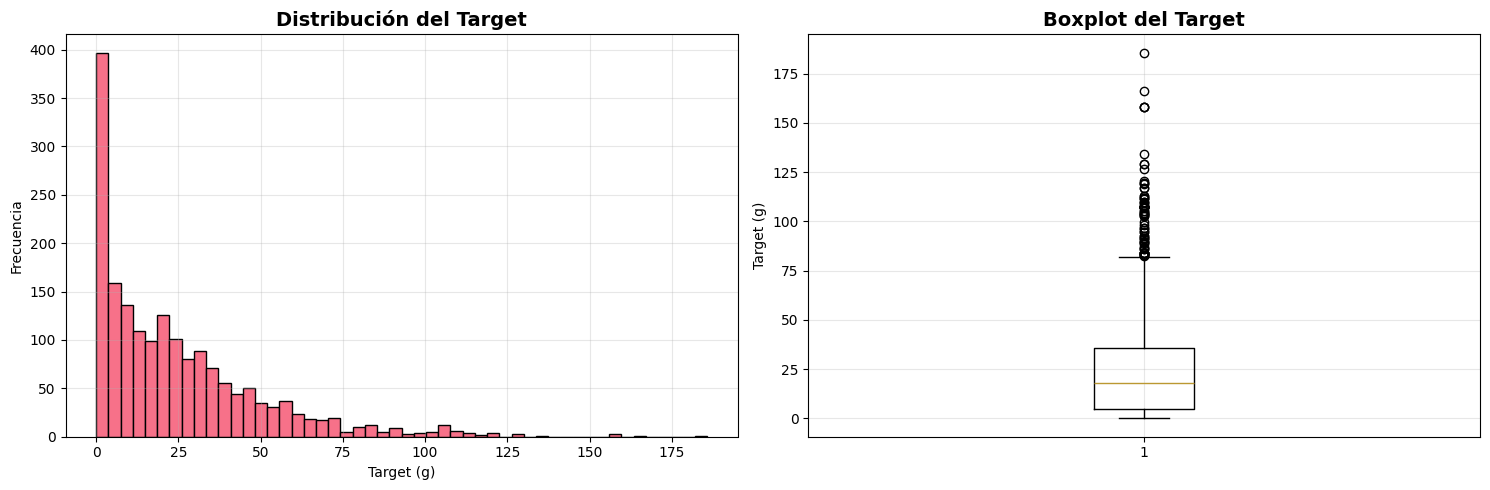

Media: 24.78 g
Mediana: 18.20 g
Desviación estándar: 25.82 g
Mínimo: 0.00 g
Máximo: 185.70 g


In [11]:
# Distribución del target
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(train_df['target'], bins=50, edgecolor='black')
axes[0].set_title('Distribución del Target', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (g)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(train_df['target'])
axes[1].set_title('Boxplot del Target', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Target (g)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print(f"Media: {train_df['target'].mean():.2f} g")
print(f"Mediana: {train_df['target'].median():.2f} g")
print(f"Desviación estándar: {train_df['target'].std():.2f} g")
print(f"Mínimo: {train_df['target'].min():.2f} g")
print(f"Máximo: {train_df['target'].max():.2f} g")

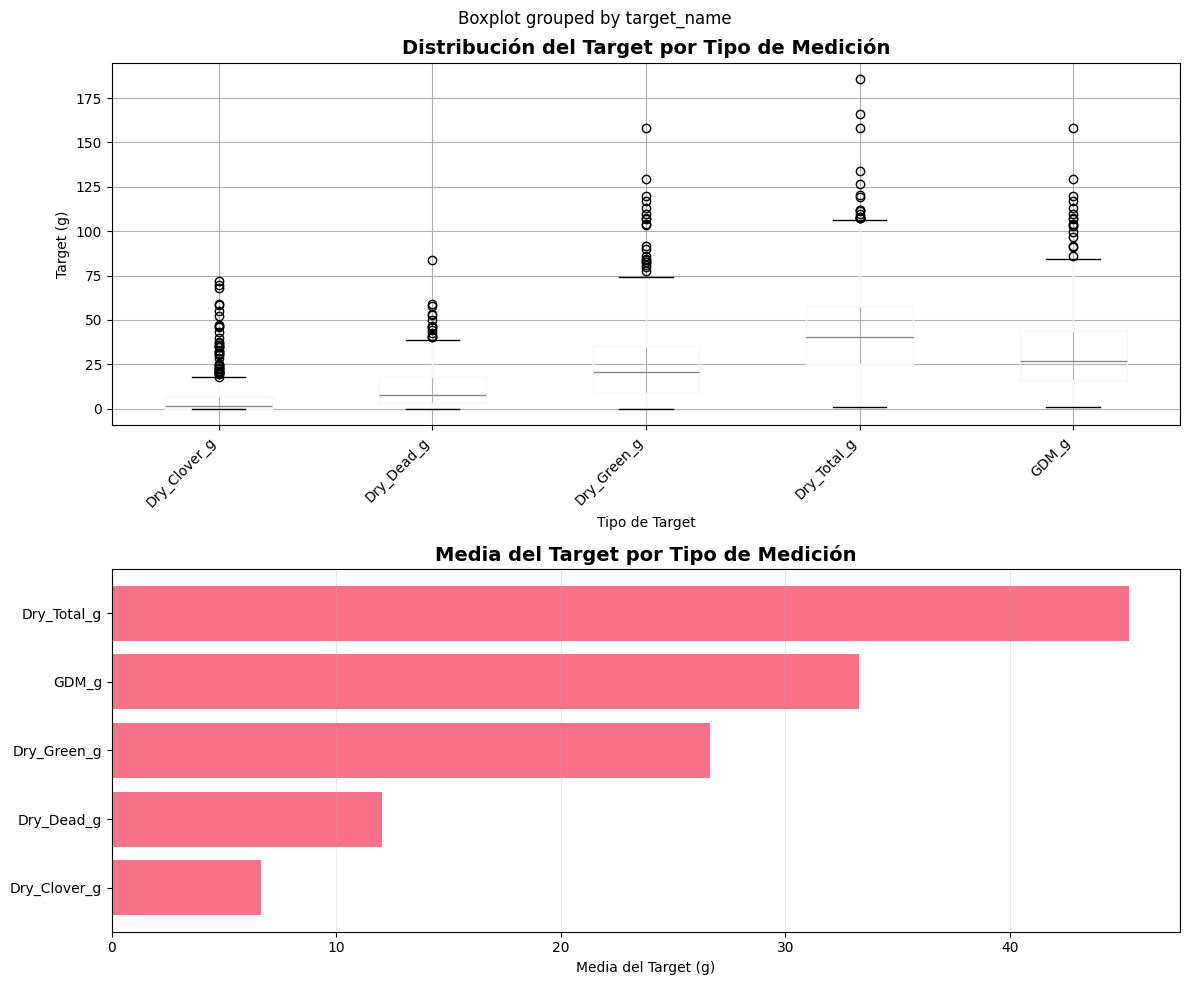

In [12]:
# Target por tipo
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Boxplot por target_name
train_df.boxplot(column='target', by='target_name', ax=axes[0])
axes[0].set_title('Distribución del Target por Tipo de Medición', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Target')
axes[0].set_ylabel('Target (g)')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Media por target_name
target_means = train_df.groupby('target_name')['target'].mean().sort_values()
axes[1].barh(target_means.index, target_means.values)
axes[1].set_title('Media del Target por Tipo de Medición', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Media del Target (g)')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 4.5 Análisis de características numéricas

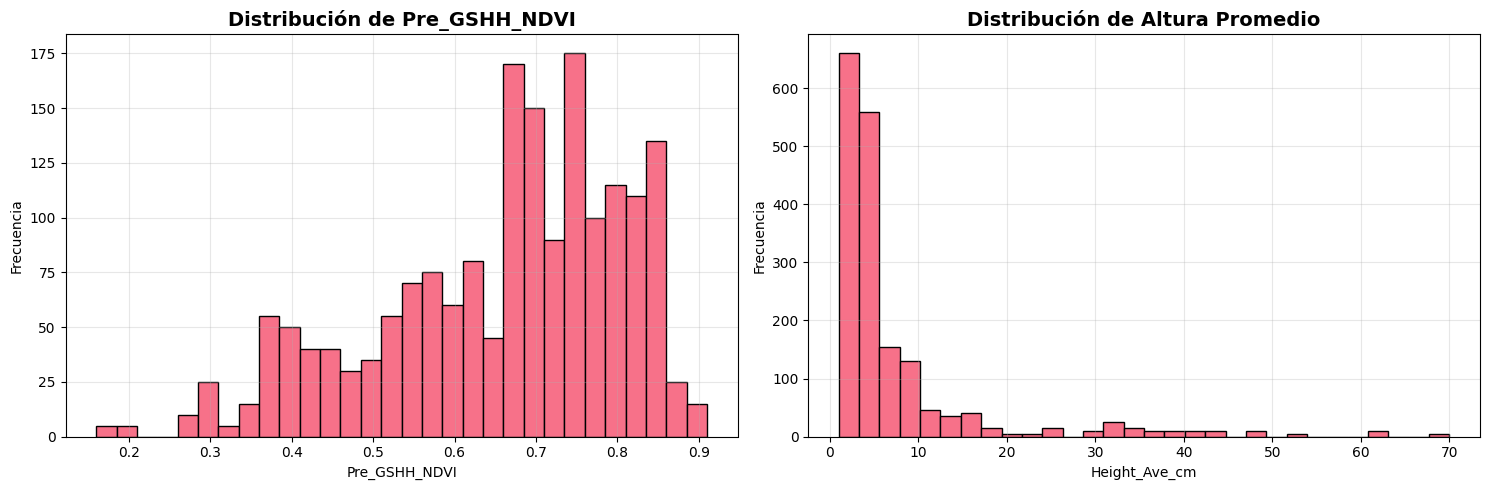

In [13]:
# Distribución de Pre_GSHH_NDVI
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(train_df['Pre_GSHH_NDVI'], bins=30, edgecolor='black')
axes[0].set_title('Distribución de Pre_GSHH_NDVI', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Pre_GSHH_NDVI')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(alpha=0.3)

axes[1].hist(train_df['Height_Ave_cm'], bins=30, edgecolor='black')
axes[1].set_title('Distribución de Altura Promedio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Height_Ave_cm')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4.6 Correlaciones

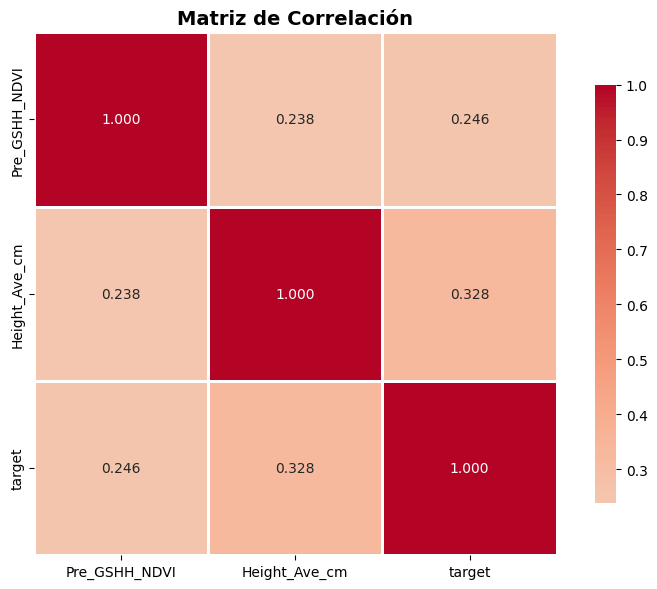

In [14]:
# Matriz de correlación
numeric_cols = ['Pre_GSHH_NDVI', 'Height_Ave_cm', 'target']
corr_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

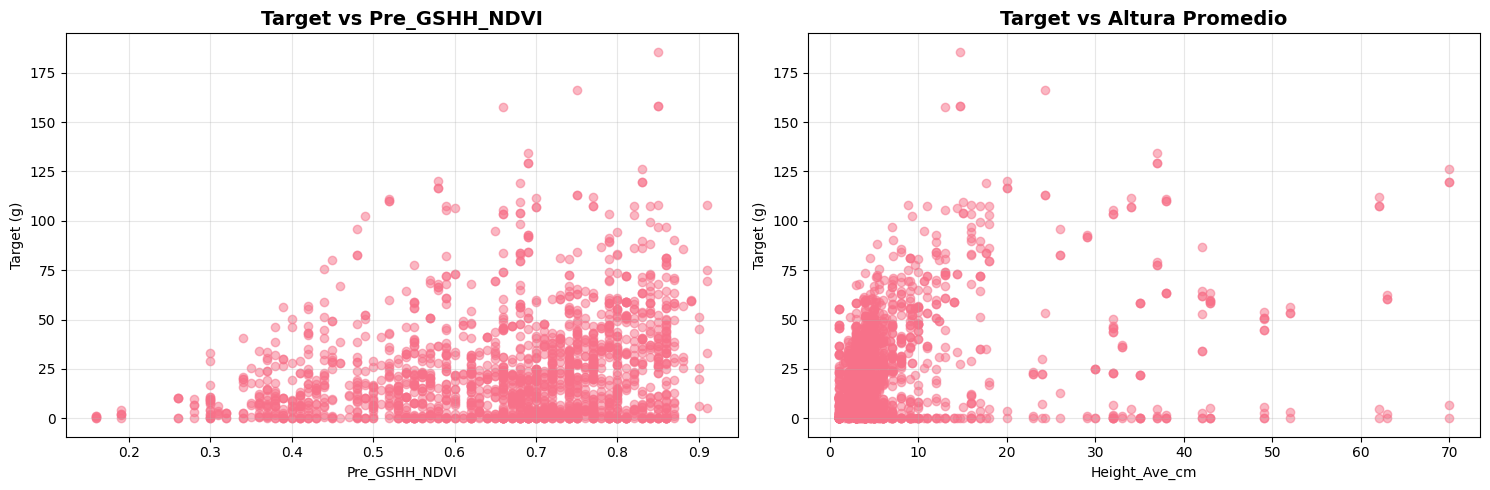

In [15]:
# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(train_df['Pre_GSHH_NDVI'], train_df['target'], alpha=0.5)
axes[0].set_title('Target vs Pre_GSHH_NDVI', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Pre_GSHH_NDVI')
axes[0].set_ylabel('Target (g)')
axes[0].grid(alpha=0.3)

axes[1].scatter(train_df['Height_Ave_cm'], train_df['target'], alpha=0.5)
axes[1].set_title('Target vs Altura Promedio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Height_Ave_cm')
axes[1].set_ylabel('Target (g)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4.7 Análisis por Estado y Especie

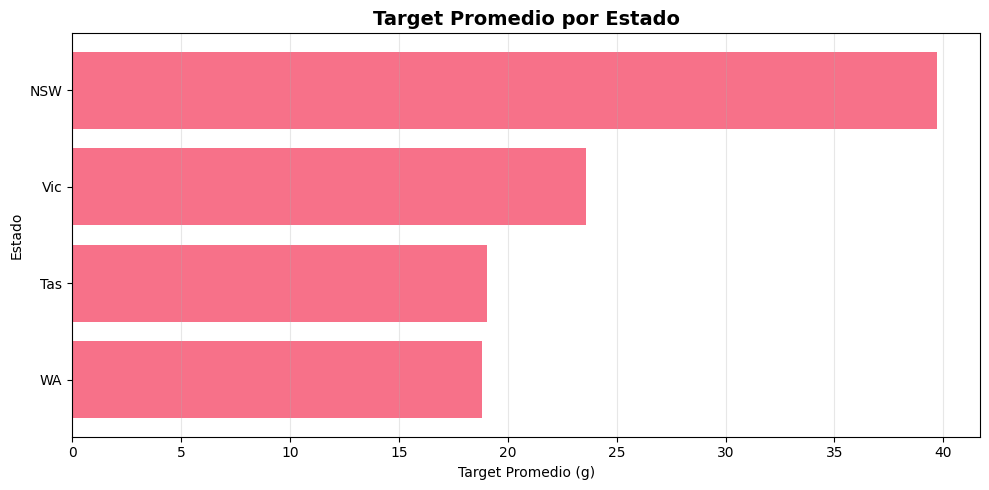

In [16]:
# Target promedio por Estado
state_target = train_df.groupby('State')['target'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.barh(state_target.index, state_target.values)
plt.title('Target Promedio por Estado', fontsize=14, fontweight='bold')
plt.xlabel('Target Promedio (g)')
plt.ylabel('Estado')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

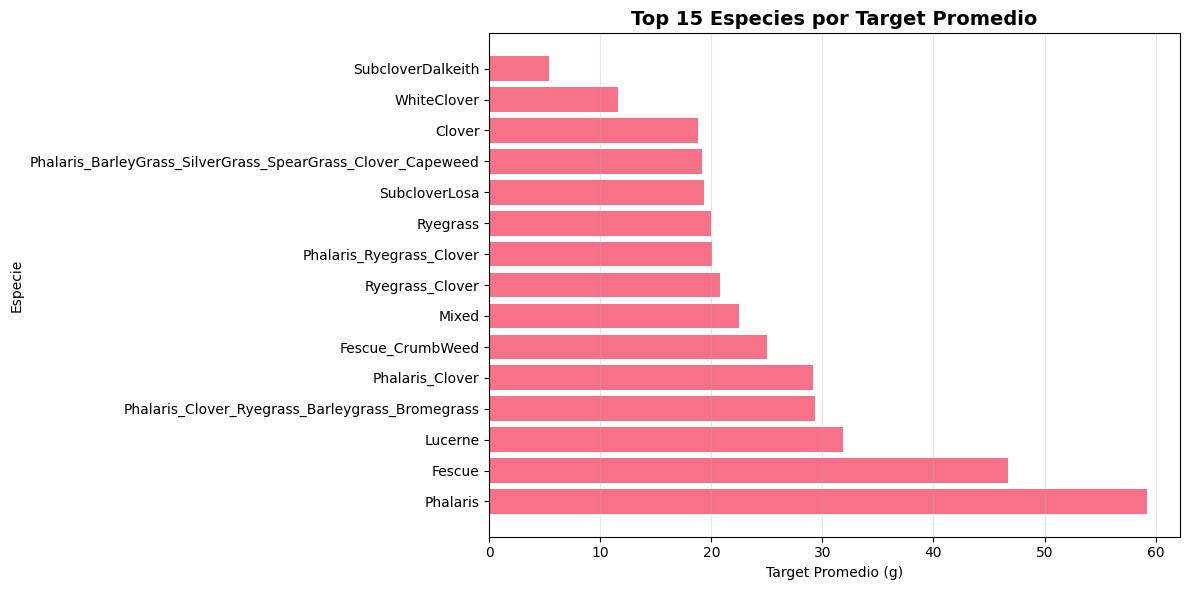

In [17]:
# Target promedio por Especie (top 15)
species_target = train_df.groupby('Species')['target'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(species_target.index, species_target.values)
plt.title('Top 15 Especies por Target Promedio', fontsize=14, fontweight='bold')
plt.xlabel('Target Promedio (g)')
plt.ylabel('Especie')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 4.8 Ejemplo de carga de imagen

Información de la muestra:
Sample ID: ID1011485656__Dry_Clover_g
Species: Ryegrass_Clover
State: Tas
Height: 4.6667 cm
NDVI: 0.62
Target: 0.0 g (Dry_Clover_g)


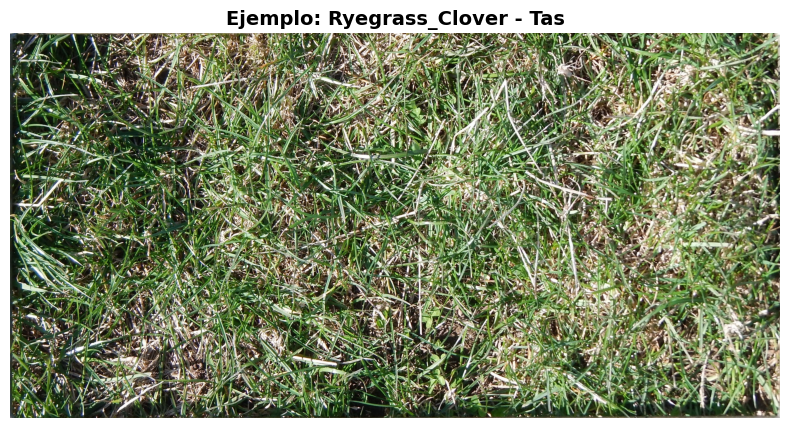

In [18]:
# Mostrar una imagen de ejemplo
sample_image_path = train_df['image_path'].iloc[0]
sample_info = train_df[train_df['image_path'] == sample_image_path].iloc[0]

print(f"Información de la muestra:")
print(f"Sample ID: {sample_info['sample_id']}")
print(f"Species: {sample_info['Species']}")
print(f"State: {sample_info['State']}")
print(f"Height: {sample_info['Height_Ave_cm']} cm")
print(f"NDVI: {sample_info['Pre_GSHH_NDVI']}")
print(f"Target: {sample_info['target']} g ({sample_info['target_name']})")

show_image(sample_image_path, title=f"Ejemplo: {sample_info['Species']} - {sample_info['State']}")